DRILL: Mo' blobs, mo' problems?
You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( kk -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [27]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [28]:
#creating the data
def blobone():
    global b1, X, y
    b1 = 'Blob one'
    from sklearn.datasets.samples_generator import make_blobs
    from sklearn.model_selection import train_test_split

    # The coordinates of the centers of our blobs.
    centers = [[3, 3], [-3, -3], [3, -3], [5, -5], [8, -8]]

    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 1 and 2 features.
    X, y = make_blobs(
        n_samples=10000,
        centers=centers,
        cluster_std=1,
        n_features=2,
        random_state=42)

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('This is the random data created by ' + b1 + ', no processing yet')
    plt.show()

    #Divide into training and test sets.
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)


In [29]:
#creating the data X2

def blobtwo():
    global b1, X, y
    b1 = 'blob two'

    from sklearn.datasets.samples_generator import make_blobs
    from sklearn.model_selection import train_test_split

    # The coordinates of the centers of our blobs.
    centers = [[1, 1], [-1, -1], [1, -1], [4, -4]]

    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 2 and 10 features.
    X, y = make_blobs(
        n_samples=10000,
        centers=centers,
        cluster_std=2,
        n_features=10,
        random_state=42)

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('This is the random data created by ' + b1 + ' no processing yet')
    plt.show()

    #Divide into training and test sets.
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)

In [30]:
#creating the data for blob three
def blobthree():
    global b1, X, y
    b1 = 'Blob three'

    from sklearn.datasets.samples_generator import make_blobs
    from sklearn.model_selection import train_test_split

    # The coordinates of the centers of our blobs.
    centers = [[5, 1], [-5, -2], [5, -2], [-3, 3], [6, 2], [-4, -4]]

    # Make 10,000 rows worth of data with two features representing three
    # clusters, each having a standard deviation of 3 and 100 features.
    X, y = make_blobs(
        n_samples=50000,
        centers=centers,
        cluster_std=3,
        n_features=100,
        random_state=42)

    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('This is the random data created by ' + b1 + ' no processing yet')
    plt.show()

    #Divide into training and test sets.
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.9,
        random_state=42)

# Meanshift Blob One, 5 blobs, Make 10,000 rows worth of data with two features representing three clusters, each having a standard deviation of 1 and 2 features.

Looks like the model was very decisive in how it divided the clusters up by category, but I'm not certain where the categories came from.


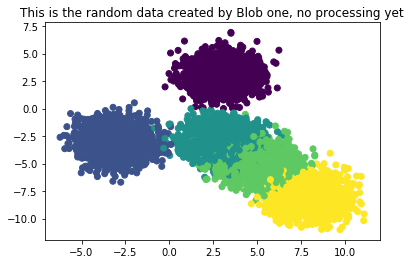

Number of estimated clusters: 4


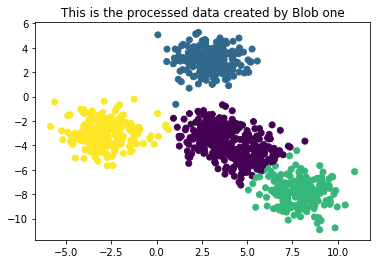

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0  184  172    1
1      221    0    1    0    0
2        0    0    0   15  197
3        0  203    6    0    0


In [40]:
#MeanShift 
blobone()
#blobtwo()
#blobthree()

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=5000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

#plotting the processed data
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('This is the processed data created by ' + b1)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(labels, y_train))

# Meanshift Blob two, 4 blobs, Make 10,000 rows worth of data, each having a standard deviation of 2 and 10 features.

Adding the extra features to this model caused it to compress the data into one feature, not sure if this is acceptable or not.

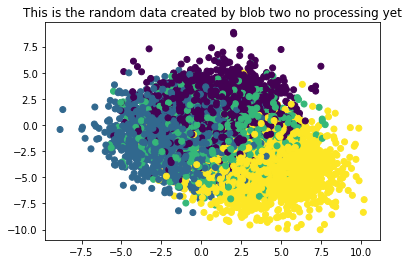

Number of estimated clusters: 1


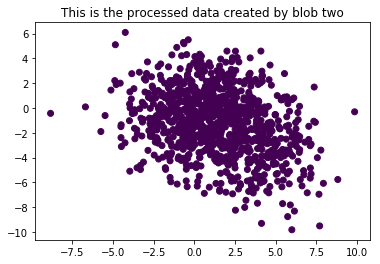

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      273  239  238  250


In [42]:
#MeanShift 
#blobone()
blobtwo()
#blobthree()

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=5000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

#plotting the processed data
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('This is the processed data created by ' + b1)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(labels, y_train))

# Meanshift Blob three, 6 blobs, Make 50,000 rows worth of data, each having a standard deviation of 3 and 100 features.

Compressed 100 features down to two, and in most of the clusters the model did a poor job on predictions.

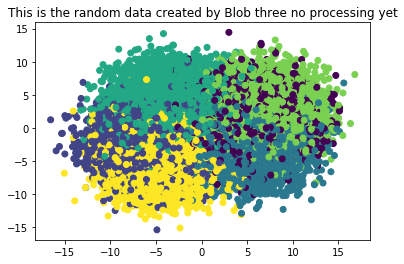

Number of estimated clusters: 2


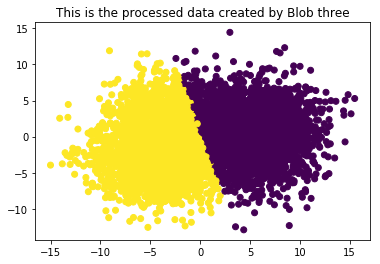

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5
row_0                              
0      737   32  780  200  809   35
1       37  794   64  703   19  790


In [41]:
#MeanShift 
#blobone()
#blobtwo()
blobthree()

from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=5000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

#plotting the processed data
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('This is the processed data created by ' + b1)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(labels, y_train))

# Spectral Clustering Blob One, 5 blobs, Make 10,000 rows worth of data with two features representing three clusters, each having a standard deviation of 1 and 2 features.

A couple of the clusters were very decisive about which category to place the data in, but a couple were not, MeanShift did a better job sorting this data.

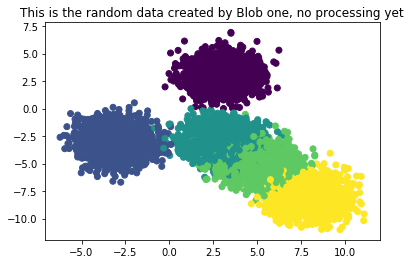

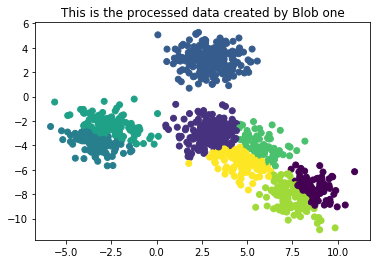

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3    4
row_0                        
0        0    0    0   1   92
1        0    0  165  13    0
2      221    0    0   0    0
3        0   91    0   0    0
4        0  112    3   0    0
5        0    0   10  71    0
6        0    0    0   3  104
7        0    0   13  99    2


In [43]:
#Spectral Clustering
blobone()
#blobtwo()
#blobthree()
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=4

# Declare and fit the model.
sc = SpectralClustering()
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('This is the processed data created by ' + b1)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(predict, y_train))

# Spectral Clustering Blob two, 4 blobs, Make 10,000 rows worth of data, each having a standard deviation of 2 and 10 features.

This model did a good job sorting data in 3 of the 4 clusters (cluster 3 not so good), and did not lump all the data into one classification like MeanShift.

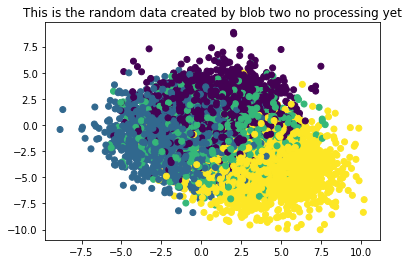

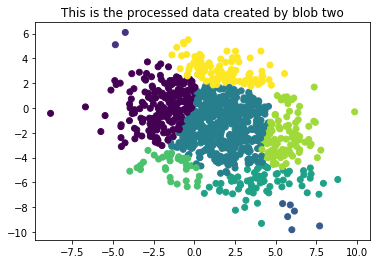

Comparing the assigned categories to the ones in the data:
col_0    0    1    2   3
row_0                   
0       66  114   44   1
1        2    0    0   0
2        0    0    0   6
3      126   85  160  98
4        0    1    2  64
5        1   27    5   3
6        7    3   12  78
7       71    9   15   0


In [44]:
#Spectral Clustering
#blobone()
blobtwo()
#blobthree()
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
#n_clusters=4

# Declare and fit the model.
sc = SpectralClustering()
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('This is the processed data created by ' + b1)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(predict, y_train))

# Spectral Clustering Blob three, 6 blobs, Make 50,000 rows worth of data, each having a standard deviation of 3 and 100 features.

This model is not quite a decisive with the datapoints a MeanShift.

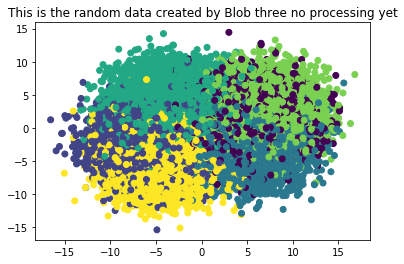

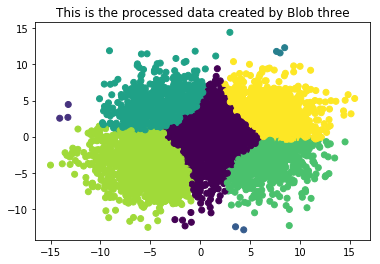

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5
row_0                              
0      325  137  330  269  229  148
1        0    1    0    1    0    1
2        0    0    1    0    0    1
3        1    0    0    0    2    0
4       13  106    0  507   13   22
5      110    0  392    2  109    6
6        5  582    7  114    1  647
7      320    0  114   10  474    0


In [45]:
#Spectral Clustering
#blobone()
#blobtwo()
blobthree()
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
#n_clusters=4

# Declare and fit the model.
sc = SpectralClustering()
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('This is the processed data created by ' + b1)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(predict, y_train))

# Affinity Propogation Blob One, 5 blobs, Make 10,000 rows worth of data with two features representing three clusters, each having a standard deviation of 1 and 2 features.

Model is very decisive on which cluster it assigns the data to.



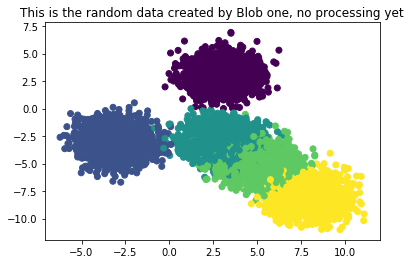

Done
Estimated number of clusters: 19


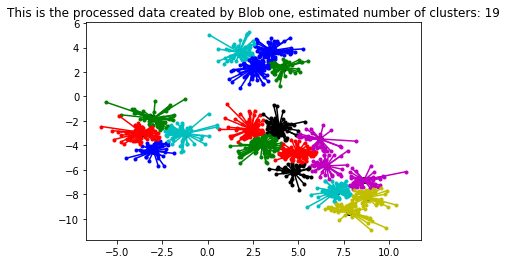

col_0   0   1   2   3   4
row_0                    
0      62   0   0   0   0
1      44   0   0   0   0
2       0   0  62   0   0
3       0   0   0   1  57
4       0   0   0  27   7
5       0   0   0   0  37
6       0   0   2  36   1
7       0  45   0   0   0
8       0  52   0   0   0
9       0  66   0   0   0
10     47   0   0   0   0
11      0   0   0   0  46
12      0   0   0   0  50
13      0   0  56   6   0
14     68   0   0   0   0
15      0   0  59  15   0
16      0   0   3  71   0
17      0  40   5   0   0
18      0   0   4  31   0


In [37]:
#Affinity Propogation
blobone()
#blobtwo()
#blobthree()
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('This is the processed data created by ' + b1 + ', estimated number of clusters: {}'.format(n_clusters_))
plt.show()
print(pd.crosstab(labels, y_train))

# Affinity Propogation Blob two, 4 blobs, Make 10,000 rows worth of data, each having a standard deviation of 2 and 10 features.

This model is not very decisive on how it sorts the data.

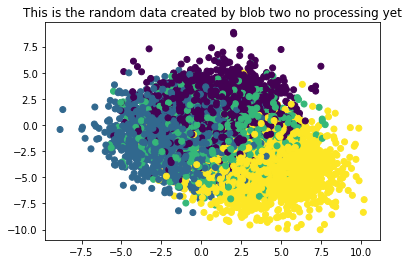

Done
Estimated number of clusters: 37


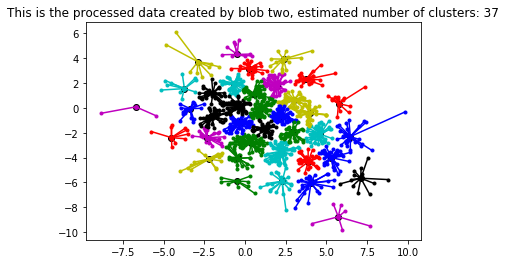

col_0   0   1   2   3
row_0                
0       2   7   7   0
1       6  17  21   6
2      14   0   5   0
3       2   4  14  29
4       2  19   3   0
5       7   2   1   0
6       5  27   5   1
7       0   0   0  27
8       1  13   5   3
9       4   1   7   3
10     22   8   4   0
11     27   2   9   0
12     14   1   1   0
13      0   0   0  13
14     11  15  20   0
15     21  15   9   1
16      0   9   1   0
17      3   6   2   0
18      0   0   0   7
19     18   4  13   1
20     11  12   5   0
21     18   7  22   6
22      0   5   2   2
23      0   0   3  25
24      0   0   2  18
25      0   3   0   0
26      1  14   2   0
27     15  17  16   1
28      0   0   0  31
29     25   8   6   1
30     15   5   2   0
31      3   4   5  25
32      9   1   0   0
33      6   0  16   8
34      7   8  17   3
35      0   0   1  28
36      4   5  12  11


In [38]:
#Affinity Propogation
#blobone()
blobtwo()
#blobthree()
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('This is the processed data created by ' + b1 + ', estimated number of clusters: {}'.format(n_clusters_))
plt.show()
print(pd.crosstab(labels, y_train))

# Affinity Propogation Blob three, 6 blobs, Make 50,000 rows worth of data, each having a standard deviation of 3 and 100 features.

This model generated over 1500 clusters, not sure how to interpret that.

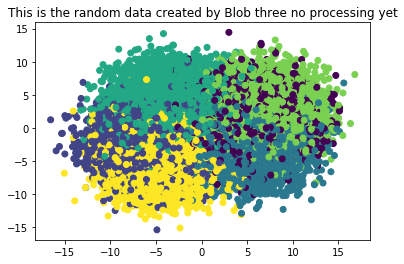

Done
Estimated number of clusters: 1513


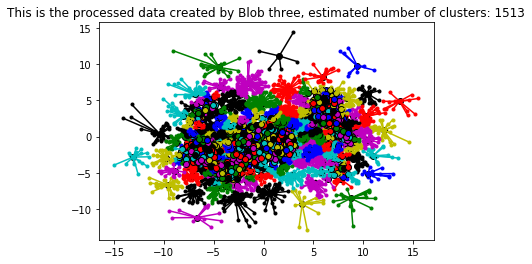

col_0   0  1   2   3   4   5
row_0                       
0       0  0   1   0   0   1
1       0  0   0   0   0   1
2      21  1   1  13  16   0
3       0  0   0   0   1   0
4       0  0   0  24   0   0
5       0  2   0   0   0   0
6       0  0   0   1   0   0
7       0  1   0   0   0   0
8       0  0   1   0   0   0
9       0  0   0   0   0   1
10      0  0   0   0   1   0
11      0  1   0   0   0   0
12      0  0  12   0   0   3
13      0  9   0   2   0  11
14      0  0   0  10   0   0
15      0  3   0   1   0   0
16      0  0   0   0   0   1
17      1  0   0   0   0   0
18      0  0   0   1   0   0
19      0  0   0   0   0   1
20      0  0   0   3   0   0
21      0  0   0   0   0   1
22      0  0   0   0   0   3
23      0  0   0   1   0   0
24      0  0   0   1   0   0
25      0  0   0   1   0   0
26      0  0   0   1   0   0
27      1  0   0   0   0   0
28      0  0   0   1   0   0
29      0  0   1   0   0   0
...    .. ..  ..  ..  ..  ..
1483    0  0   1   0   0   0
1484    0  0  

In [39]:
#Affinity Propogation
#blobone()
#blobtwo()
blobthree()
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('This is the processed data created by ' + b1 + ', estimated number of clusters: {}'.format(n_clusters_))
plt.show()
print(pd.crosstab(labels, y_train))

# KMeans  Blob One, 5 blobs, Make 10,000 rows worth of data with two features representing three clusters, each having a standard deviation of 1 and 2 features.

Model did an excellent job on catagorizing data in two clusters, not so much in cluster one,  MeanShift did a better job with this dataset.

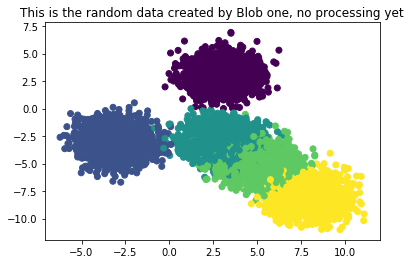

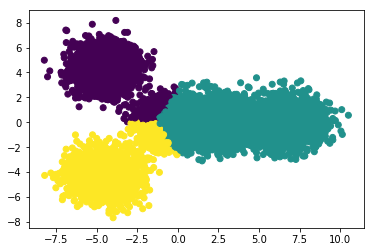

Comparing k-means clusters against the data:
col_0     0     1     2     3     4
row_0                              
0      2000     0   275     1     0
1         0     0  1459  1997  2000
2         0  2000   266     2     0


In [14]:
#kmeans
blobone()
#blobtwo()
#blobthree()
# Normalize the data.
#X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

# KMeans Blob two, 4 blobs, Make 10,000 rows worth of data, each having a standard deviation of 2 and 10 features.

Very indecisive model, the data is kind of evenly weighted across categories.

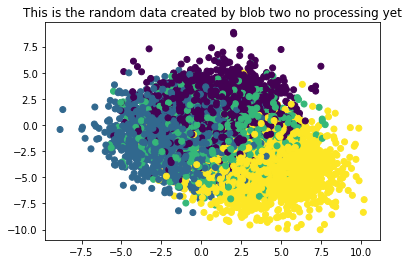

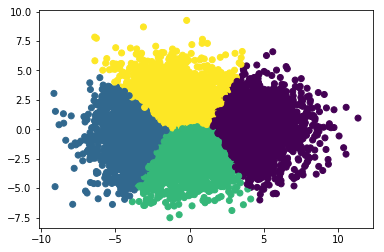

Comparing k-means clusters against the data:
col_0     0     1    2     3
row_0                       
0        68    68  289  2001
1       736   987  399     5
2       321  1117  929   302
3      1375   328  883   192


In [15]:
#kmeans
#blobone()
blobtwo()
#blobthree()
# Normalize the data.
#X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

# KMeans Blob three, 6 blobs, Make 50,000 rows worth of data, each having a standard deviation of 3 and 100 features.

Model is very decisive, but I'm not certain where all thes catagories came from

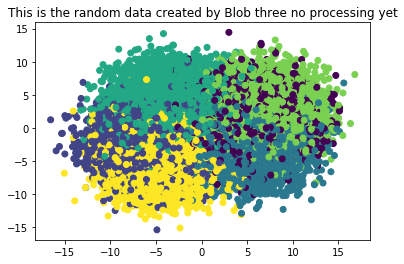

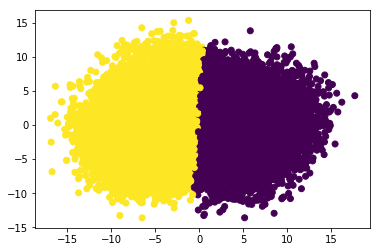

Comparing k-means clusters against the data:
col_0     0     1     2     3     4     5
row_0                                    
0      7840   250  7644  1498  8091   387
1       494  8084   689  6835   242  7946


In [49]:
#kmeans
#blobone()
#blobtwo()
blobthree()
# Normalize the data.
#X_norm = normalize(X)

# Reduce it to two components.
X_pca = PCA(2).fit_transform(X)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))